# Discovering Common Themes and Language Patterns Between Dating Profiles on OKCupid Using TF-IDF and Semantic Similarity


**by:** Phuong Thao Nguyen


**Research Focus:** The aim is to determine whether certain subjects are more prevalently mentioned in dating profiles among groups differentiated by their alcohol consumption habits.

**Goal:** This notebook is dedicated to examining how various profiles, particularly those that participate in recreational drinking, articulate their interests. We will also investigate the feasibility of grouping these profiles by the sentiment expressed within their self-descriptions.

## Introduction
As the digital dating landscape becomes ever more integral to the social fabric of modern romance, individuals take to online platforms to construct profiles that broadcast their personal hobbies, lifestyle choices, and more. The language they adopt serves not just to communicate information but also to project distinct social and personal identities. Despite the variety of expressions used across profiles, there are often linguistic commonalities among users, particularly when they align with specific interest groups, such as those related to drinking habits. This phenomenon raises the question: even as individuals strive to stand out, are there discernible patterns in language that correlate with their attitudes towards drinking?

In their comprehensive study, "Dating Apps and Their Sociodemographic and Psychosocial Correlates: A Systematic Review," Di Blasi et al. explore the notion that the behaviors and motivations driving individuals to use dating apps, like seeking sexual partnerships, may be intertwined with their drinking practices. This insight prompts us to further investigate into whether the language used by app users distinctly reflects their drinking behavior—essentially, does the verbiage in dating profiles echo the users' stance on alcohol consumption, despite the overarching intent to present a unique persona?

## Citation

CHATGPT

## Research Question


**Research Question:** Can we differentiate between frequent vs non-frequent drinkers based on their dating descriptions and how do they differ when compare to each other?

**Secondary Question:** What are the topics that the two groups talk about and how do they differ? How do these topics vary across each group?


**Hypothesis:** Based on the self-descriptions of users on OKCupid, it is possible to differentiate between them. Users who frequently drink are likely to have descriptions that reflect social outings and activities, just as those who drink less or not at all will exhibit similar traits in their profiles. Whereas infrequent drinkers or non-drinkers might emphasize interests in lifestyle or hobbies. It is expected that the content of these descriptions will gravitate towards themes reflective of their respective drinking habits.

In addition, infrequent drinkers will have more variety in their interests compare to frequent drinkers. 

**Secondary Hypothesis :** 
The topics between each group will be vastly different with  social activities topics in frequent groups while there will be more family or introverted activities as topics in infrequent group. 



## About the Data

Source: https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook_revised.txt
https://www.kaggle.com/datasets/bryanteh/profiles-dating-app

The data consist of profiles from OKCupid that record a descriptions of user's profiles. The profiles contains the following variables:

**Age:** The user's age.

**Body Type:** A descriptive term for the user's physical shape or build.

**Diet:** The user's eating habits or dietary preferences.

**Drinks:** Frequency or preference regarding alcohol consumption by the user.

**Drugs:** Information regarding the use of recreational drugs by the user.

**Education:** The highest level of schooling or academic achievement the user has completed.

**Essay0 - Essay9:** The User's descriptions of themselves


**Ethnicity:** The user's cultural background or ethnicity.

**Height:** The user's height, likely in inches or centimeters.

**Income:** The user's annual income or salary range.

**Job:** The user's occupation or type of work they do.

**Last Online:** The last time the user was online or active on the platform.

**Location:** The user's current city or place of residence within California

**Offspring:** Information regarding whether the user has children or not, and if they want to have kids in the future

**Orientation:** The user's sexual orientation.

**Pets:** Information about whether the user has pets and what kind.

**Religion:** The user's religious beliefs or affiliation.

**Sex:** The user's biological sex or gender identity.

**Sign:** The user's astrological sign.

**Smokes:** Information regarding whether the user smokes cigarettes or tobacco.

**Speaks:** The languages the user speaks.

**Status:** The user's relationship status (e.g., single, seeing someone, married).


The main focus is the smokes and essay portion. In addition to this, the 9 essays will be combined into 1 singles variable called "combined_essay"

#### Separating the data into two groups


There are 2 focus groups: group who drinks frequently and those who drinks infrequently. In order to analyze the semantic similarity within groups and cross groups, I will separate the profiles into 2 groups, frequent_drinking and infrequent_drinking


The dataset contains the column "drinks" which users will indicate their drinking preference. The selections are the following: often, very often, desperately, not at  all, and rarely. These words are indicators of which group the profile belongs to.


**frequent_drinking:**  ['often', 'very often', 'desperately']

**infrequent_drinking:** ['not at all', 'rarely']

## Approaches

To examine the relationship between OKCupid users' drinking habits and the content of their self-introductions, our study will employ a three-phased analytical approach.


#### **Logistic Regression Analysis**
In the initial phase, we will perform logistic regression analysis. This statistical method will enable us to determine whether the self-descriptions of users who frequently drink are significantly different from those who do not drink or drink rarely, based on their profile texts.


#### **MNF**
We then move on to topic modeling to investigate if there are topics within the frequent and infrequent often talk about. Instead of choosing all of the essays and combined into one like we did for logistic regresion, in this case we will look at the text for each essay. Each essay itself is a prompt that user can answer, we only chose users who have answered all of the essay prompts. 
In addition, we have intentionally selected seven of the ten essays from the dataset, focusing on those that delve into personal behaviors and characteristics rather than just interests. This is the chosen essays:


essay0- My self summary 

essay2- I’m really good at 

essay3- The first thing people usually notice about me 

essay5- The six things I could never do without 

essay6- I spend a lot of time thinking about 

essay7- On a typical Friday night I am 

essay8- The most private thing I am willing to admit 


This approach allows us to concentrate on essays that are more likely to yield insights into lifestyle choices which are crucial to our study. By excluding essays primarily centered around occupational and leisure activities (essay1, essay4, and essay9) such as "What I’m doing with my life," "Favorite books, movies, shows, music, and food," and "You should message me if...", we aim to narrow down our analysis to topics that directly involve behavioral patterns. This refined focus enhances our ability to understand how these behaviors interconnect with broader personal traits, thereby providing a deeper, more coherent analysis of the data with Matrix Factorization (MNF) and the Silhouette score.



 The dataset will be refined to include only relevant columns: the 'drinks' column, which indicates the user's drinking habit, and the essay columns ('essay0' to 'essay9'), which contain the users' self-descriptive narratives. This selection was intended to capture the essence of how users present themselves in relation to their drinking habits.

In [378]:
# !pip install spacy

In [379]:
# !pip install beautifulsoup4 spacy



In [214]:
# !pip install wordcloud

In [ ]:
# !pip install gensim

In [ ]:
# # !pip install spacy
# !python -m spacy download en_core_web_sm


In [380]:
#find out where you are and move to correct location
import os #package for figuring out operating system
import pandas as pd
import spacy
import numpy as np
import plotly.graph_objects as go
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# nlp = spacy.load("en_core_web_sm")

#load model
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

In [281]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from gensim import corpora, models

In [282]:
import spacy
import numpy as np
from scipy.spatial.distance import cosine
from scipy.stats import ttest_ind

In [283]:
df = pd.read_csv(
    "profiles.csv",
    encoding="ISO-8859-1",
    )
df.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Data Wrangling

### Examining each of the essays
according to Kim, A. Y., & Escobedo-Land, A. (2015). OkCupid Data for Introductory Statistics and Data Science Courses. Journal of Statistics Education, 23(2). https://doi.org/10.1080/10691898.2015.11889737, the desciptions for each essay is :

"essay0- My self summary essay1- What I’m doing with my life essay2- I’m really good at essay3- The first thing people usually notice about me essay4- Favorite books, movies, show, music, and food essay5- The six things I could never do without essay6- I spend a lot of time thinking about essay7- On a typical Friday night I am essay8- The most private thing I am willing to admit essay9- You should message me if..."

Since each essay represent the promp, we want to see if all users answer the the prompt. Step includes examining whether there is a prompt that all of the users answer and keeping only that one, or if every single users need to answer that specifc prompt

In [ ]:
#dropna
# df.dropna(subset=['drinks'], inplace=True)
df = df[['drinks',  'essay1', 'essay2', 'essay3', 'essay0', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']]
df.head(2)

### Examine whether we should keep all essays or not. In this case, let's look at how many users kept their essays

In addition, there are NaN values in the essay columns, which indicate that some users prefer to answer certain questions over others. For this reason, we decided to analyze whether there is a preference for specific questions. This analysis will help us understand which questions are most popular among users. If we find that some questions are not commonly answered, we will consider removing users who only respond to these less popular questions to maintain data consistency. Conversely, if we observe a consistent proportion of responses across all questions or similar response rates, we will combine all the answers into a single string to get a comprehensive profile description. 

### Removing NAs

Here we see that there is not one single essay that we should completely removed. Hence, to avoid missing data, we shall kept only the users that answer all the essays 

In [ ]:
df = df[['drinks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].dropna()

### Creating a uniform self-description for each user from all 9 different essays

In our first approach to preparing the OKCupid dataset for analysis of users' self-descriptions in relation to their drinking habits, we began a detailed cleaning process. Our goal was to clean the essays by eliminating hyperlinks and stopwords, and then standardizing the text for uniform syntax.

We observed that the essay texts contained HTML tags, remnants of user interactions via web interfaces, URLs, and other elements that could compromise data quality. To address this, we developed a function to remove these HTML tags and URLs, ensuring only authentic user narratives remained. This step was crucial for purifying the content and removing web formatting clutter.

After removing these elements, we applied text normalization to extract only alphanumeric word sequences from the essays, eliminating punctuation, special characters, and symbols. We also removed NaN values from both the essays and drinking status columns to ensure data consistency.

Some users left certain essay columns blank, indicating a preference for specific questions. We will analyze this pattern to understand which questions are most popular.

Next, we will create a 'combined essay' column, as our data includes nine different essays per user. This will provide a summary of how users describe themselves in their profiles."

In [ ]:
#remove html, stop words, lemmantize words and keep only alphabet words
def clean_text(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    doc = nlp(text)
    cleaned_text = ' '.join([token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha])
    return cleaned_text

# List of essay columns
essay_columns = ['essay1', 'essay2', 'essay3', 'essay0', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

# Apply the clean_text function to each essay column
for column in essay_columns:
    df[column] = df[column].apply(clean_text)

#combined essay
essay_columns = ['essay1', 'essay2', 'essay3', 'essay0', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']  
df['cleaned_essay'] = df[essay_columns].fillna('').apply(lambda x: ' '.join(x), axis=1)
    

In [ ]:
df.head(10)

In [ ]:
df.to_csv('profiles_cleaned.csv')

In [314]:
dataframe = pd.read_csv('profiles_cleaned.csv')
dataframe

,Unnamed: 0,drinks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,cleaned_essay
0,0,socially,want sweep foot tired norm want catch coffee b...,currently work international agent freight for...,make people laugh rant good salting find simpl...,way look foot half asian half caucasian mutt m...,book absurdistan republic mouse man book want ...,food water cell phone shelter,duality humorous thing,try find hang club,new california look wisper secret,want sweep foot tired norm want catch coffee b...,want sweep foot tired norm want catch coffee b...
1,5,socially,awesome,build awesome stuff figure important have adve...,imagine random shit laugh aforementioned rando...,big smile ask wear blue colour contact,book kill mockingbird lord ring farseer trilog...,like love friend family need hug human contact...,contribution world go breakfast love breakfast,friend,cry day school bird shat head true story,awesome,awesome build awesome stuff figure important h...
2,9,not at all,rock bell,apartment like explore check thing like good j...,good find creative solution problem organize l...,short,like tv love summer height high angry boy love...,music guitar contrast good food bike paintbrus...,NaN,send message,hi,rock bell,rock bell apartment like explore check thing l...
3,10,socially,complex woman healthy self esteem intelligent ...,job sound lighting event make new friend keep ...,hugging kiss laugh motivate people massage coo...,huge goofy smile,constantly read read friend describe incredibl...,family friend food woman music reading,snowboarding food woman goofy nerd stuff archi...,have dinner drink friend work,wish jetpack blow candle birthday cake wish ar...,complex woman healthy self esteem intelligent ...,complex woman healthy self esteem intelligent ...
4,11,socially,know want life genuine guy like send message p...,currently young member internal strategy team ...,good little bit truly excel average good area ...,way dress day hat day different tie day shoe j...,book yes avid reader move eternal sunshine van...,guitar play time get available outlet correcti...,little bit social influence everybody connect ...,hang small group friend stay go enjoy collecti...,picky come date know look will waste time,know want life go genuine guy go like send mes...,know want life genuine guy like send message p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28907,59941,socially,seek long term connection share joy,happy time life come run ahead sound cliche li...,outstanding osso bucco creative thrive enjoyme...,tell people notice smile eye way dress,avid movie watcher follow broadway season movi...,family dog italy word music,write book,run dog finish work week look forward great we...,dream sing alconquin nyc live italy cinque ter...,seek long term connection share joy,seek long term connection share joy happy time...
28908,59942,often,meh far,currently finish school film production emphas...,filmmake photography graphic design web design...,dude know,movie hook great adventure gladiator fight clu...,iphone contact lense headphone camera tv remot...,thinking bus work usually seat smell like urin...,bringin home bacon drinking shakin,get tattoo waldo body,meh far,meh far currently finish school film productio...
28909,59943,not at all,similar interest,civil engineer enjoy help citizen san san fran...,look thing objectively get thing disagree p re...,quiet environment normal,book game change movie bourne series action sm...,iphone friend family internet bay area sport h...,aside work improve home,enjoy friendly conversation dinner,let think,similar interest,similar interest civil engineer enjoy help cit...
28910,59944,socially,interested interesting,follow dream get dream get to protect people w...,listen,hair mow dimple remember indent cheek think sm...,begin musically right listen lot mgmt mike pos...,music family friend basketball hoop read,chuckle,day everyday friday,like walk people house naked seriously body be...

In [316]:
dataframe.drinks.isna().sum()

0

In [117]:
dataframe = dataframe.dropna()

### Process of Seprating Profiles into 2 Observation Groups

Following the consolidation of individual essays into a unified 'combined_essay' column, which streamlined the dataset and captured the essence of each user's self-description, we transitioned to a nuanced analysis of their social habits. Specifically, we segmented users based on their self-reported drinking behaviors, distinguishing between **'frequent'** and **'infrequent'** drinkers through terms like 'often' and 'rarely'.

Our objective is to curate a dataset focused exclusively on users' drinking habits and their self-descriptions, ensuring a streamlined analysis of how lifestyle choices are reflected in personal narratives.

In [285]:
print(f"These are the possible drinking options in OKCupid: {np.unique(list(df['drinks']))}")


These are the possible drinking options in OKCupid: ['desperately' 'nan' 'not at all' 'often' 'rarely' 'socially' 'very often']


Let's look at the distribution of the of each of these options. 

In [286]:
import plotly.express as px

In [287]:
# Assuming 'df' is your DataFrame and 'drinks' is the column of interest
item_counts = dataframe['drinks'].value_counts()

# # Convert the Series to a DataFrame
# item_counts_df = item_counts.reset_index()
# item_counts_df.columns = ['Drinking Options', 'Count']

# # Create the bar chart using Plotly Express

# fig = px.bar(item_counts_df, x='Drinking Options', y='Count',
#              title='Number of Users per Drinking Option',
#              labels={'Drinking Options': 'Drinking Options', 'Count': 'Count'})

# # Show the figure
# fig.show()


In [317]:
item_counts

drinks
socially       20665
rarely          3233
often           2717
not at all      1861
very often       241
desperately      195
Name: count, dtype: int64

The majority of the data comes from the 'socially' group where it is difficult to determine whether the drinking frequency is 'frequent' or 'infrequent' due to the lack of information about the users' social outings. Since the statement appears neutral and we aim to categorize drinking based on frequency, it is best to exclude these users.

After excluding these users, We categorized users from a dataset into two groups based on their self-reported drinking habits, identifying some as 'frequent' drinkers using terms such as 'often' and 'very often', and others as 'infrequent' drinkers using terms such as 'rarely' and 'not at all'. Subsequently, we created two distinct data subsets for these categories. We also added a new column to each subset to explicitly label users as 'frequent' or 'infrequent' drinkers, laying the groundwork for a future merge of these subsets while maintaining a clear distinction between the two groups.

However, keep in mind that when we separate the options into two groups, we lose a lot of our data. That is why we decided to review the distribution beforehand to consider splitting the data into two groups and then balancing them.

In [318]:
import pandas as pd

# Define the categories for frequent and infrequent drinking
frequent_drinking = ['often', 'very often', 'desperately']
infrequent_drinking = ['not at all', 'rarely']

# Create two separate datasets
df_frequent = dataframe[dataframe['drinks'].isin(frequent_drinking)]
df_infrequent = dataframe[dataframe['drinks'].isin(infrequent_drinking)]

#create a new column that marks how frequent they drink, we will be combining these data together later so we would want to categorize them
df_frequent['drink_status'] = 'frequently'
df_infrequent['drink_status'] = 'infrequently'

df_frequent = df_frequent[['drink_status','cleaned_essay', 'essay1', 'essay2', 'essay3', 'essay0', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'] ]
df_infrequent = df_infrequent[['drink_status','cleaned_essay', 'essay1', 'essay2', 'essay3', 'essay0', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'] ]

/tmp/ipykernel_11547/1733373772.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_11547/1733373772.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This segmentation into two distinct data subsets, each marked by a new column to reflect drinking frequency, laid the foundation for a comprehensive comparison. It allowed us to maintain a clear distinction between user groups, setting the stage for a deeper exploration of the intersection between personal narratives and lifestyle choices.

### Balancing the Data

After dividing the two groups into those who drinks frequently and those who drinks infrequently, we observe the length of the two groups to see if there are more users in one of the two groups.

In [323]:
print("Length of frequent drinkers group before balance:", len(df_frequent))
print("Length of infrequent drinkers group before balance:", len(df_infrequent))

Length of frequent drinkers group before balance: 3153
Length of infrequent drinkers group before balance: 5094


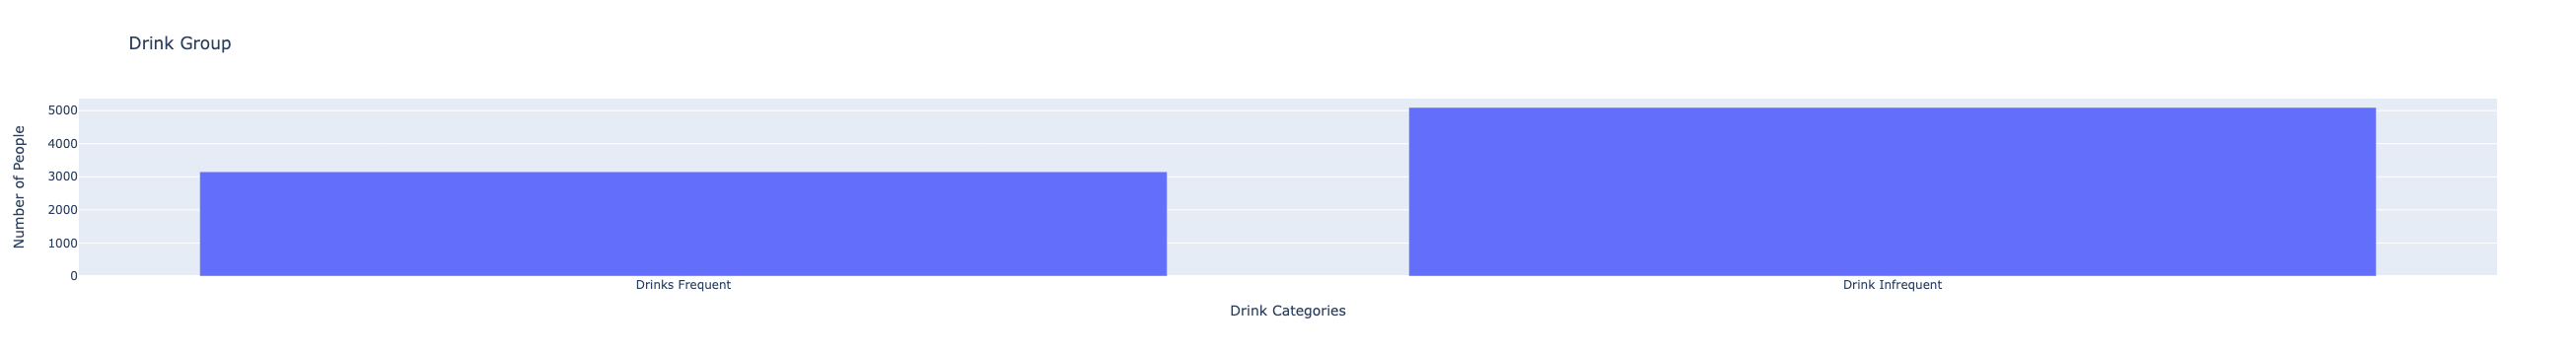

In [324]:
drink_categories = ['Drinks Frequent', 'Drink Infrequent']

drink_len = [len(df_frequent), len(df_infrequent)]
# Create the bar graph
fig = go.Figure(data=[go.Bar(x=drink_categories, y=drink_len)])

# Customize the layout
fig.update_layout(
    title='Drink Group',
    xaxis_title='Drink Categories',
    yaxis_title='Number of People',
)

# Show the figure

Infrequent drinkers group is about 42% larger than the frequent drinkers group. Following this evaluation, we will implement a balancing technique to equalize the sizes of the two groups. This step is crucial for our subsequent analysis, as it ensures that our logistic regression model can accurately assess how self-descriptions vary between frequent and infrequent drinkers without bias toward the larger group.

In [325]:
from sklearn.utils import resample

# Undersample the majority class
drinks_undersampled = resample(df_infrequent,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_frequent),     # to match minority class
                                    random_state=123) # reproducible results


This is our result after balancing the two groups.

In [326]:
print("Length of frequent drinkers group after balance:", len(df_frequent))
print("Length of infrequent drinkers groupafter balance", len(drinks_undersampled))

Length of frequent drinkers group after balance: 3153
Length of infrequent drinkers groupafter balance 3153


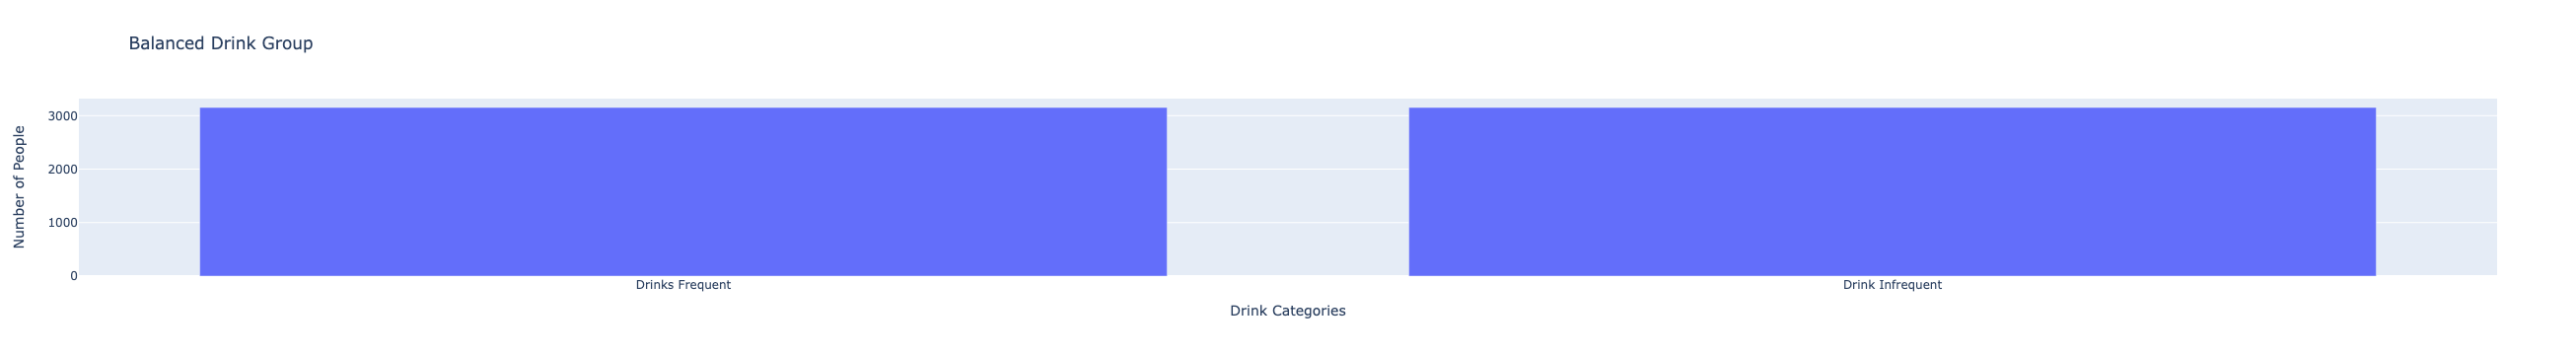

In [327]:
drink_categories = ['Drinks Frequent', 'Drink Infrequent']

drink_len = [len(df_frequent), len(drinks_undersampled)]
# Create the bar graph
fig = go.Figure(data=[go.Bar(x=drink_categories, y=drink_len)])

# Customize the layout
fig.update_layout(
    title='Balanced Drink Group',
    xaxis_title='Drink Categories',
    yaxis_title='Number of People',

)

# Show the figure

Finally, we combined the undersampled infrequent drinkers group with the frequent drinkers group. By undersampling the larger group (infrequent drinkers) to match the size of the smaller group (frequent drinkers) and then concatenating the two, we ensured that both categories are equally represented. This balanced dataframe, now containing an equal number of users from each drinking category, sets the stage for a more unbiased analysis in our subsequent logistic regression model.

In [328]:
# Combine the undersampled class with the minority class
balanced_df = pd.concat([drinks_undersampled, df_frequent])
balanced_df

,drink_status,cleaned_essay,essay1,essay2,essay3,essay0,essay4,essay5,essay6,essay7,essay8,essay9
8770,infrequently,want work hard industrial engineer have time l...,work hard industrial engineer have time like s...,maybe photography,come meet new people assume unusual,want,read lot list favorite author book long time m...,ok silly mean like son computer ipad internet ...,life general live presence negative influence ...,typical life,answer honestly,want
21434,infrequently,deal fact open nonmonogamous relationship find...,try follow heart thing happy personally profes...,good computer bake lift heavy thing juggle fas...,people notice size hard room usually eye humor...,deal fact open nonmonogamous relationship find...,favorite book voracious reader love read hard ...,internet access computer live kitty yes large ...,spend great deal time think want life matter r...,usually spend quiet night home partner recover...,huge teddy bear,deal fact open nonmonogamous relationship find...
3045,infrequently,kind fun like think consciousness expansive fa...,favorite part work train people turning point ...,validate people try good listen,calm demeanor,kind fun like think consciousness expansive,anatomy epidemic robert whitaker howl move cas...,curiosity love potential growth hope stick ble...,self improvement friend throw party spirituality,host dinner party,know ride bike,kind fun like think consciousness expansive
23721,infrequently,like park outside like yoga music event dance ...,work coffee month decide think make art,drawing painting talk music go upside,curly hair nice friendly lay,like park outside like yoga music event dance ...,music indie pop indie electronic psychedelic p...,food water sleep caffeine sunshine music,future hold,try switch,pretty open,like go park outside like yoga go music event ...
20445,infrequently,like read open meet person day elementary scho...,day elementary school counselor aid kid good b...,play sport share conversation read book,chinese eye funny notice easily visible people,like read open meet person,book jackie robinson story redemption song aut...,friend music book computer laughter dancing,family life travel,generally have good time friend regardless,recently cut hair year take new picture,like read open meet person
...,...,...,...,...,...,...,...,...,...,...,...,...
28858,frequently,want summer madmen discussion friend workout a...,prepare bar drink like lawyer,make bad leftover delicious eat rice hand herd...,height eye,want summer madmen discussion friend workout a...,madmen steinbeck steak tartare good show louie...,live middle prefer family sunshine peace quiet...,escape timbuktu law student budget,spend cab,site year,want summer madmen discussion friend workout a...
28860,frequently,chill good time journalist filmmaker interacti...,journalist filmmaker interactive medium produc...,make people smile read emotion competitive lol...,mannerism voice height eye color unique style,chill good time,power glory native son great gatsby barry lynd...,baseball beer book laughter,hypothetical situation,like go till sun come narcoleptic tendency figure,true love die,chill good time
28870,frequently,think great friend love write delete try somed...,love write delete try someday,see good people situation get excited natural ...,mexican people hear usually assume white meet ...,think great friend,book city salt truck professor madman music bl...,parent sibling friend pen paper laughter music...,empower oakland youth,have drink friend catch sleep lose week readin...,sure,think great friend
28884,frequently,like dinosaur personal shopping mean shopping ...,personal shopping mean shopping live ci tay tr...,make joke watching lose tell people suck,laugh butt expensive shoe order,like dinosaur,like tv movie music different food,tv sister electricity netflix work day beer,bff dog day go wear later obama win,celebrate day rest fam puzzle like party,scared antique,like dinosaur


# Using LogisticRegression to predict frequent vs infrequent drinker



After balancing the data, the next step we will use is the application of logistic regression with TF-IDF vectorization to discern potential variations in self-descriptions between the two groups. This step is pivotal as it complements our analysis by extracting words that are thematically specific to each group, highlighting meaningful distinctions. The successful classification of the groups by logistic regression indicates the presence of unique words in their self-descriptions, allowing us to identify and extract these words to uncover the differing thematic elements within each group's narrative.

#### How Logistic Regression Work


Logistic regression in this context would analyze the TF-IDF transformed textual features (representing self-descriptions) alongside the corresponding labels (indicating drinking frequency) to classify users into frequent or infrequent drinking groups. By learning patterns from the TF-IDF features, logistic regression would then predict the likelihood of a user belonging to a particular drinking category based on their self-description, aiding in the identification of significant linguistic patterns that differentiate between the two groups.

#### Assign Creating Labels and Features

First, We are extracting the 'combined_essay' column to represent users' self-descriptions assigning it to documents and 'drink_status' column to label for classification labeling. Below is one example of our label and document that will be use in classification

In [329]:
# Assign 'combined_essay' to documents and 'drink_status' to labels
documents = balanced_df['cleaned_essay']
labels = balanced_df['drink_status']

# Print one example of labels and description
print("Example description:", documents.iloc[0])
print("Example label:", labels.iloc[0])



Example description: want work hard industrial engineer have time like start spend lot time read go gym day simply enjoy feel guilty able great maybe photography come meet new people assume unusual bear prague czech republic grow communism parent bitter regime apparently rich communist take happy child friend fun thing rich kid poor difference recall base smart united state mental midget respect lot money judge intelectual level like well original country actually advantage different major attach specific class have freedom accomplish set mind come usa seek well life come visit family russians take country means favor communism glad spend childhood regime provide insight normally need instance learn live horrible system victim mean find way rule law consider beneficial help situation country good thing weird want people tolerate culture weird standard instance freeway stop speeding audacity tell cop think number mean speed limit think believe ticket read lot list favorite author book l

In [330]:
documents

8770     want work hard industrial engineer have time l...
21434    deal fact open nonmonogamous relationship find...
3045     kind fun like think consciousness expansive fa...
23721    like park outside like yoga music event dance ...
20445    like read open meet person day elementary scho...
                               ...                        
28858    want summer madmen discussion friend workout a...
28860    chill good time journalist filmmaker interacti...
28870    think great friend love write delete try somed...
28884    like dinosaur personal shopping mean shopping ...
28908    meh far currently finish school film productio...
Name: cleaned_essay, Length: 6306, dtype: object

### Creating a sparse matrix to using tfidf_vectorizer


After assigning our combined_essay to documents and drink_status to label, we create a TF-IDF matrix, which is a mathematical representation of textual data, like dating profiles.

 This matrix assigns scores to words based on how important they are in each profile and how unique they are across all profiles. We achieve this by using a TfidfVectorizer tool, which also removes common words that don't help us understand the differences between profiles, like "I" or "the". After fitting this vectorizer to the profile descriptions, we obtain the TF-IDF matrix, which we can then use for various analyses, such as predicting drinking habits based on profile descriptions.

Min_df and max_df are parameters used to define the vocabulary based on document frequency (DF) thresholds. These thresholds can help in filtering out terms that are too rare or too common. 

If min_df is a float (between 0.0 and 1.0), it represents a proportion of documents. For example, min_df = 0.01 means "ignore terms that appear in less than 1% of the documents.

If min_df is an integer, it represents the minimum number of documents a term must appear in to be included in the vocabulary.

If max_df is a float, it represents a proportion of documents. For instance, max_df = 0.95 means "ignore terms that appear in more than 95% of the documents.

We used TF-IDF to calculating the average importance of each word (TF-IDF score) for each drinking frequency group, it identifies the top words that stand out the most for each category. This allows us to see which terms are more commonly used by users who drink frequently versus those who drink infrequently, providing insights into the language associated with different drinking behaviors on dating profiles.

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix

<6306x26641 sparse matrix of type '<class 'numpy.float64'>'
	with 1104494 stored elements in Compressed Sparse Row format>

We now have our tfidf_matrix. Each row represents a document (e.g., a dating profile), and each column represents a unique word.The values in the matrix indicate the importance of each word in each document, relative to the entire collection of documents.Words that appear frequently in a document but are rare across all documents receive higher scores.


Common words like 'I' or 'the' are removed, as they don't contribute much to understanding the differences between documents.The TF-IDF matrix is useful for various analyses, such as predicting characteristics or behaviors based on textual data.

## Training Model

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# TF-IDF features from previous steps and 'labels' is target variable
X = tfidf_matrix
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [333]:
#define our chosen classifier
classifier = LogisticRegression(max_iter=1000)  # Increasing max_iter to ensure convergence
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [334]:
from sklearn.metrics import accuracy_score, classification_report

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 0.7630744849445324
Classification Report:               precision    recall  f1-score   support

  frequently       0.76      0.76      0.76       631
infrequently       0.76      0.76      0.76       631

    accuracy                           0.76      1262
   macro avg       0.76      0.76      0.76      1262
weighted avg       0.76      0.76      0.76      1262



The logistic regression model achieved an accuracy of approximately 77%, indicating its ability to correctly classify users' drinking habits based on their self-descriptions from dating profiles. The precision, recall, and F1-score metrics further support the model's effectiveness, with both frequent and infrequent drinking categories exhibiting balanced performance.


Notably, the model demonstrates slightly higher precision for infrequent drinkers but slightly higher recall for frequent drinkers, suggesting a nuanced understanding of the distinctions between the two groups. Overall, these results indicate promising predictive capabilities in discerning between frequent and infrequent drinkers using textual data from dating profiles.









### Confusion Matrix

Next, we will create a confusion matrix to evaluate the true positives, true negatives, false positives, and false negatives. This is useful because it provides a detailed breakdown of the model's performance, allowing us to identify where the model is making correct classifications and where it may be misclassifying instances. By understanding these metrics, we can gain insights into the strengths and weaknesses of the model and make informed decisions for refining or optimizing its performance.

In [374]:
y_pred

array(['infrequently', 'infrequently', 'infrequently', ...,
       'infrequently', 'infrequently', 'frequently'], dtype=object)

In [375]:
y_test

14924    infrequently
27905    infrequently
207      infrequently
24087      frequently
24909    infrequently
             ...     
15585      frequently
26712      frequently
21809      frequently
177      infrequently
26593      frequently
Name: drink_status, Length: 1262, dtype: object

              precision    recall  f1-score   support

  frequently       0.76      0.76      0.76       631
infrequently       0.76      0.76      0.76       631

    accuracy                           0.76      1262
   macro avg       0.76      0.76      0.76      1262
weighted avg       0.76      0.76      0.76      1262



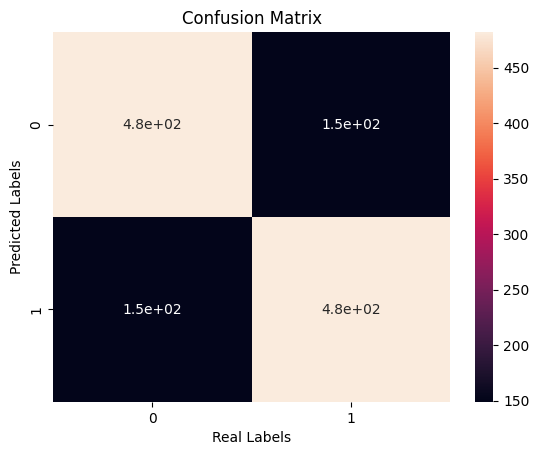

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check out a classification report
print(metrics.classification_report(y_test, y_pred))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Real Labels')
plt.ylabel('Predicted Labels')
plt.show()

With an overall accuracy of 76%, the model demonstrates balanced precision, recall, and F1-score for both groups, indicating its effectiveness in correctly classifying instances. The macro and weighted averages further reinforce the model's consistent performance across both classes, supporting its reliability in predicting drinking habits from textual data.

This shows that the model perform relative well when classifying between frequent vs infrequent profiles, suggesting that there might be words that can identify the two groups from one another. Let's examine what are the top words within each categories

In [336]:
coef_df

,coefficients,vocabulary
0,0.161462,aa
1,0.128479,aaa
2,-0.037585,aaaaand
3,-0.052856,aaaand
4,0.004346,aaaannndddd
...,...,...
26636,0.186606,zz
26637,0.101117,zzz
26638,-0.015899,zzzz
26639,0.096221,zzzzz


In [337]:
coef_df = pd.DataFrame({'coefficients':list(classifier.coef_.flatten()), 'vocabulary': list(pd.DataFrame(tfidf_vectorizer.vocabulary_, index=[0]).T.sort_values(0).index)})
# take the lowest coefficients
lowest = coef_df.sort_values(by='coefficients').head(1000).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# take the highest coefficients
highest = coef_df.sort_values(by='coefficients').tail(1000).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# put them together to compare
pd.concat([lowest, highest], axis=1)

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-7.657880,beer,2.154272,healthy
1,-7.253350,wine,2.037080,computer
2,-6.678105,drink,2.013511,learn
3,-4.733220,bar,1.655301,yoga
4,-3.101497,whiskey,1.597597,drug
...,...,...,...,...
995,-0.236180,les,0.256276,anatomy
996,-0.236120,translation,0.256163,bunny
997,-0.236110,tenenbaum,0.255694,emergency
998,-0.235991,cynicism,0.255187,ireland


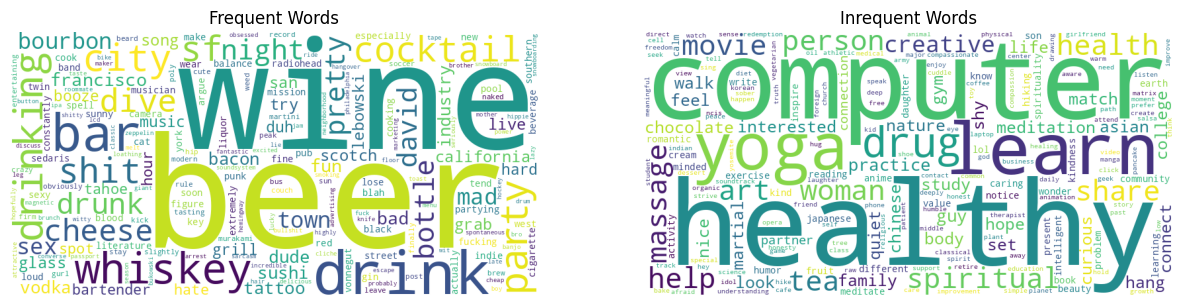

In [338]:
frequent_top = {word: abs(coef) for word, coef in zip(lowest['vocabulary_1'], lowest['coefficients_1'])}
infrequent_top = {word: coef for word, coef in zip(highest['vocabulary_2'], highest['coefficients_2'])}

# Create the word clouds
wordcloud_lowest = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequent_top)
wordcloud_highest = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(infrequent_top)

# Plot the word clouds
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_lowest)
plt.title('Frequent Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_highest)
plt.title('Inrequent Words')
plt.axis('off')

plt.show()


Comparing the top words associated with each group provides valuable insights into the thematic differences between frequent and infrequent drinkers. The words most closely linked with the "frequently" group predominantly revolve around social interactions, drinking contexts, and, notably, contain a higher frequency of profanity. This suggests a lifestyle characterized by social engagement, recreational activities, and perhaps a more casual or expressive communication style. On the other hand, the top words associated with the "infrequently" group tend to focus more on personal well-being and relational aspects, indicating a greater emphasis on individual experiences and interpersonal relationships among infrequent drinkers. This distinction highlights the diverse self-descriptive narratives within the dataset and underscores the unique lifestyle preferences and priorities associated with each drinking frequency category.

# Topic Modeling

essay0- My self summary

essay1- What I’m doing with my life

essay2- I’m really good at

essay3- The first thing people usually notice about me

essay4- Favorite books, movies, show, music, and food

essay5- The six things I could never do without

essay6- I spend a lot of time thinking about

essay7- On a typical Friday night I am

essay8- The most private thing I am willing to admit

essay9- You should message me if...

Description here is taken from: https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook_revised.txt

In this case, I will remove 

essay1- What I’m doing with my life

essay4- Favorite books, movies, show, music, and food, 

essay9- You should message me if..., 

as these reflect interests that is either occupational, leisure activities that might not reflect behaviors

In [340]:
#essays and Prompt
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay5', 'essay6', 'essay7', 'essay8']
prompt_titles = [
    "My self summary", "What I’m doing with my life", "I’m really good at",
    "The first thing people usually notice about me", 
    "The six things I could never do without", "I spend a lot of time thinking about",
    "On a typical Friday night I am", "The most private thing I am willing to admit"
]


## Silhouette Score

After obtaining the necessary essays, we want to understand the best number of topics for each of the essays. Traditionally, we would utilize the elbow test, which involves plotting the variation explained as a function of the number of clusters (or topics) and selecting the point where the increase in the number of clusters does not significantly improve the explained variation—the 'elbow point'.  In adapting this test for Non-negative Matrix Factorization (NMF), which is typically used for topic modeling rather than clustering, we modified the approach to focus on reconstruction error, how much the model's output differs from the original data; a smaller error means the model is doing a good job of capturing the important information. In our process, we tested for a maximum of 15 topics to determine if there is an optimum point for the elbow test. However, as demonstrated by the attached reconstruction error graph, the elbow test did not yield a clear 'elbow', suggesting that continually increasing the number of topics would result in a model that is too generalized and not particularly insightful, by continuously increasing the topics, the construction error would continuous drop. This occurs for both frequent and infrequent drinkers. 




In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

def nmf_reconstruction_error(data, max_topics=15):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data.dropna())  # Handle missing data

    reconstruction_errors = []
    for k in range(1, max_topics + 1):
        nmf_model = NMF(n_components=k, init='nndsvd', random_state=0)
        nmf_model.fit(tfidf_matrix)
        reconstruction_error = nmf_model.reconstruction_err_
        reconstruction_errors.append(reconstruction_error)
    return reconstruction_errors



essay_columns = ['essay0', 'essay2', 'essay3', 'essay5', 'essay6', 'essay7', 'essay8']




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

def nmf_silhouette_scores(data, max_topics=15):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data.dropna())  # Handle missing data
    
    silhouette_scores = []
    for k in range(2, max_topics + 1):  # Silhouette score requires at least 2 topics
        nmf_model = NMF(n_components=k, init='nndsvd', random_state=0)
        W = nmf_model.fit_transform(tfidf_matrix)  # Document-topic matrix
        pseudo_labels = np.argmax(W, axis=1)
        score = silhouette_score(tfidf_matrix, pseudo_labels, metric='euclidean')  # Use euclidean as an example
        silhouette_scores.append(score)
    return silhouette_scores

In response to this, we turn to the Silhouette Score, which offers a more refined measure of how similar each object (in this case, words or phrases from the essays) is to its own cluster compared to other clusters. The Silhouette Score is calculated for each instance and can take values from -1 to +1. A high silhouette score indicates that an instance is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, the clustering configuration is appropriate. If many points have a low or negative value, the clustering configuration may have too many or too few clusters. It's important to note that the Silhouette Score may yield different numbers of topics for each essay. This flexibility is advantageous as it allows for the unique content and thematic spread of each essay to determine the appropriate number of topics, rather than forcing a uniform number of topics across potentially diverse essays. This approach helps avoid overgeneralization and allows each essay's nuanced content to emerge more naturally.


Analyzing essay0...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay1...
Analyzing essay2...
Analyzing essay3...
Analyzing essay5...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay6...
Analyzing essay7...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay8...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of itera

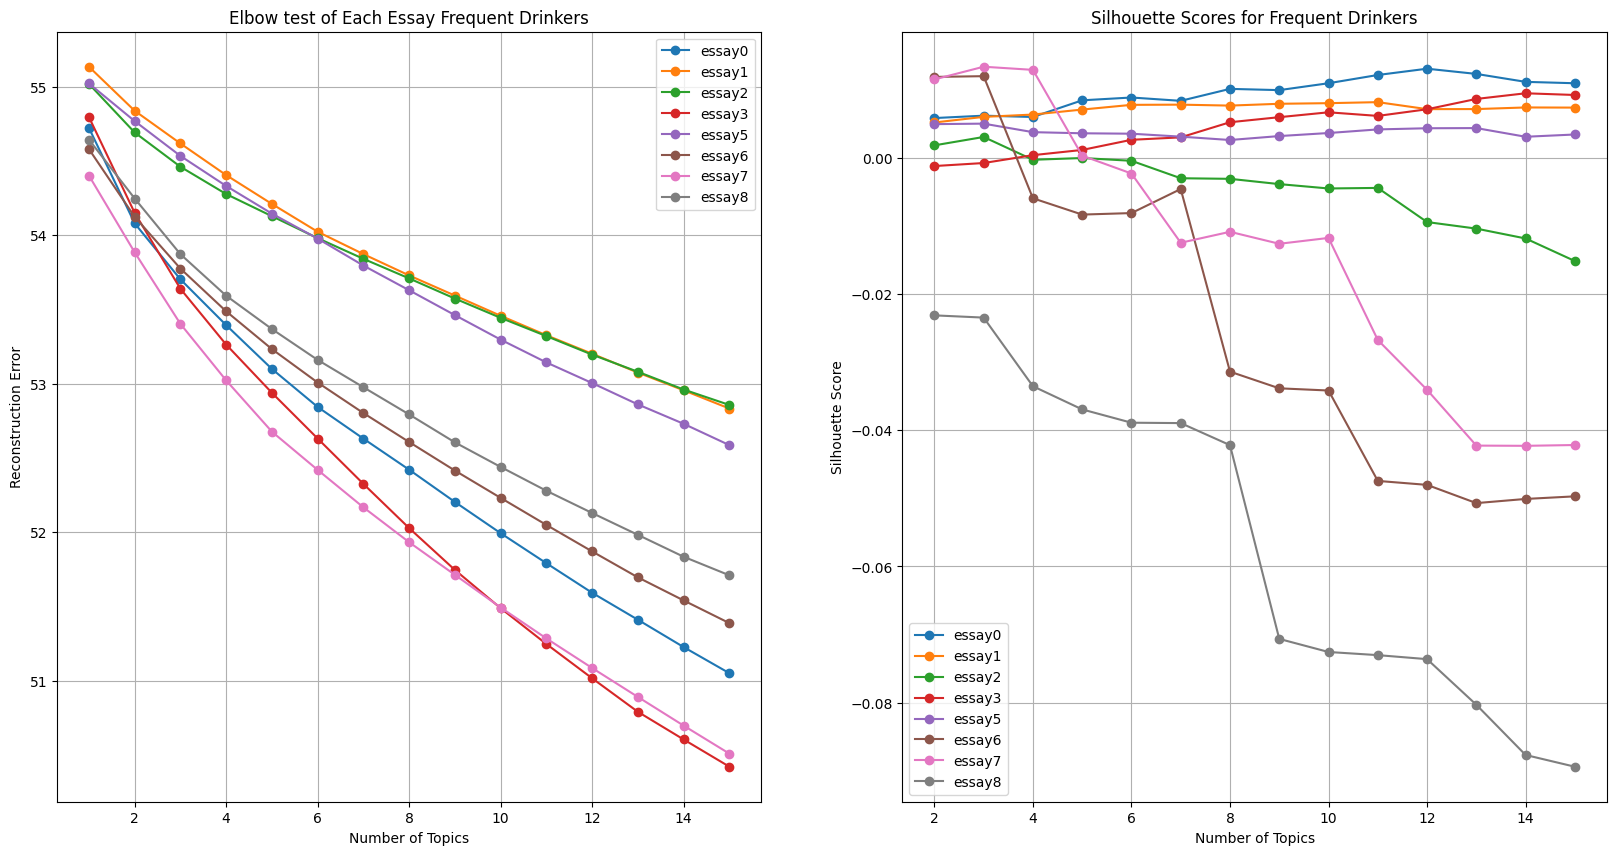

In [373]:
import matplotlib.pyplot as plt

# Assuming essay_columns, nmf_reconstruction_error, and the dataframes are defined

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Adjusted for two subplots

# First subplot for frequent drinkers
for column in essay_columns:
    print(f"Analyzing {column}...")
    errors = nmf_reconstruction_error(df_frequent[column], max_topics=15)  # Assuming df_frequent is defined
    ax1.plot(range(1, 16), errors, marker='o', label=column)

ax1.set_title('Elbow test of Each Essay Frequent Drinkers')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Reconstruction Error')
ax1.grid(True)
ax1.legend()

# First subplot for frequent drinkers
for column in essay_columns:
    if df_frequent[column].notnull().sum() > 0:  # Ensure there is data to plot
        scores = nmf_silhouette_scores(df_frequent[column], max_topics=15)
        ax2.plot(range(2, 16), scores, marker='o', label=f'{column}')  # Starting from 2 topics

ax2.set_title('Silhouette Scores for Frequent Drinkers')
ax2.set_xlabel('Number of Topics')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True)


# Display the complete figure with both subplots
plt.show()


Analyzing essay0...
Analyzing essay1...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay2...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay3...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay5...
Analyzing essay6...
Analyzing essay7...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Analyzing essay8...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



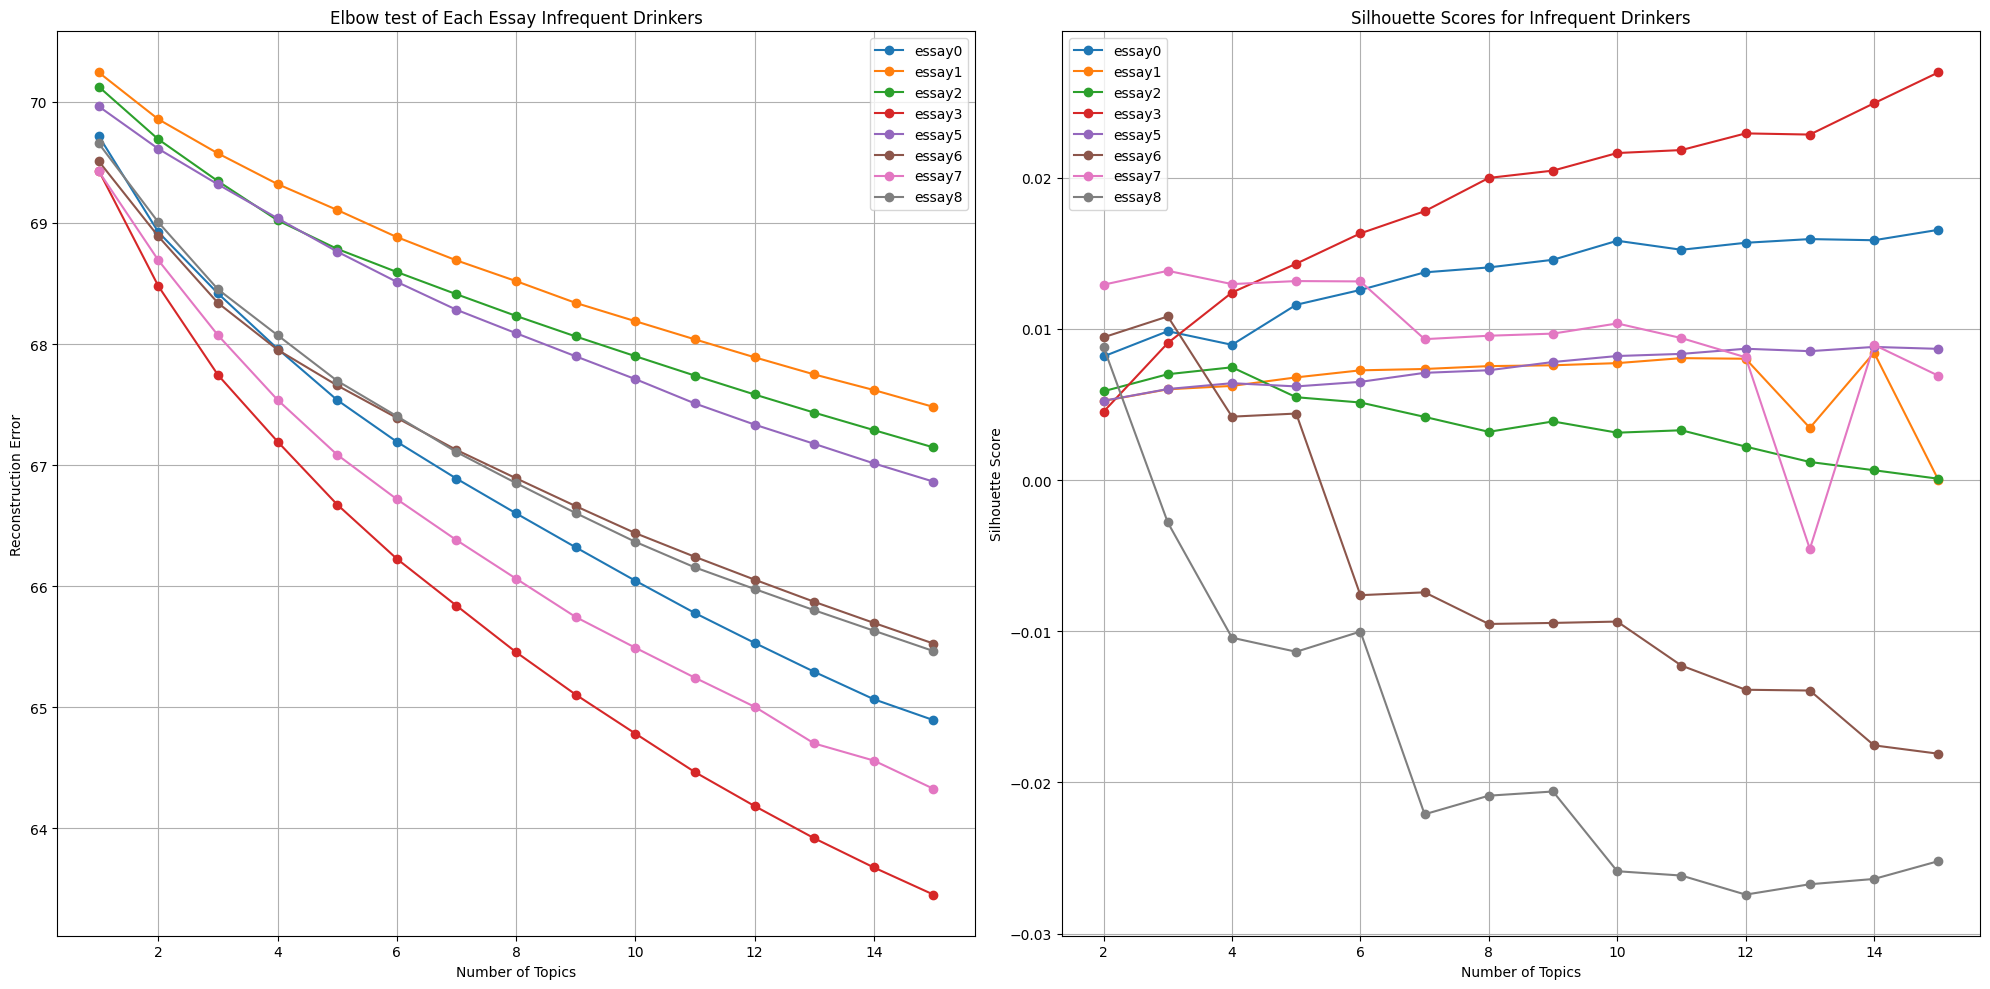

In [372]:
# Initialize subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Second subplot for infrequent drinkers
for column in essay_columns:
    print(f"Analyzing {column}...")
    errors = nmf_reconstruction_error(df_infrequent[column], max_topics=15)
    axes[0].plot(range(1, 16), errors, marker='o', label=column)

axes[0].set_title('Elbow test of Each Essay Infrequent Drinkers')
axes[0].set_xlabel('Number of Topics')
axes[0].set_ylabel('Reconstruction Error')
axes[0].grid(True)
axes[0].legend()

# Second subplot for infrequent drinkers
for column in essay_columns:
    if df_infrequent[column].notnull().sum() > 0:  # Ensure there is data to plot
        scores = nmf_silhouette_scores(df_infrequent[column], max_topics=15)
        axes[1].plot(range(2, 16), scores, marker='o', label=f'{column}')  # Starting from 2 topics

axes[1].set_title('Silhouette Scores for Infrequent Drinkers')
axes[1].set_xlabel('Number of Topics')
axes[1].set_ylabel('Silhouette Score')
axes[1].legend()
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()




After determining the optimal number of topics using the Silhouette Score, we will employ Non-negative Matrix Factorization (NMF). This technique will be utilized in conjunction with the number of topics suggested by the Silhouette Score to generate the top words for each topic, thus allowing us to ascertain the themes that are prevalent within them. NMF is particularly suited for this task as it excels in decomposing high-dimensional data while maintaining the non-negativity of the data, which is inherent to word frequencies in text.


## MNF

NMF is an unsupervised learning algorithm that decomposes a high-dimensional non-negative data matrix, such as a TF-IDF weighted document-term matrix from text data, into two lower-dimensional non-negative matrices. This method is especially effective in text mining and topic modeling because it helps identify patterns and topics within large collections of textual data. The process begins by transforming each essay into a vector within the TF-IDF space, ensuring each word’s frequency is balanced by its commonality across all documents. NMF then factors this matrix into a document-topic matrix (W) and a topic-term matrix (H), where W illustrates how each document relates to the underlying topics, and H shows which terms are most significant for each topic. By analyzing the top terms from the H matrix, we can identify and interpret the main themes expressed by different user groups on OKCupid, providing a clear view of the prevalent topics among frequent and infrequent drinkers. 


In [361]:

def apply_nmf(tfidf_matrix, n_topics=5):
    """Applies NMF to the given TF-IDF matrix and returns the model and the topic-term matrix."""
    nmf_model = NMF(n_components=n_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf_matrix)  # Document-topic matrix
    H = nmf_model.components_  # Topic-term matrix
    return nmf_model, W, H

In [362]:
def analyze_essay_topics_and_score(dataframe, text_column, prompt_title, n_topics=5):
    results = {}
    print(f"\nAnalyzing {prompt_title}...")
    valid_entries = dataframe[text_column].dropna()
    if valid_entries.empty:
        print(f"No data to process in {text_column}")
        return None

    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(valid_entries)

    nmf_model, W, H = apply_nmf(tfidf_matrix, n_topics=n_topics)
    
    topics = []

    feature_names = tfidf_vectorizer.get_feature_names_out()
    for i, topic_weights in enumerate(H):
        top_features_ind = topic_weights.argsort()[-10:][::-1]
        top_features = [feature_names[j] for j in top_features_ind]
        weights = topic_weights[top_features_ind]

        print(f"\nTop words for topic {i+1} in {prompt_title}:")
        print(", ".join(top_features))
        topics.append({"words": top_features, "weights": weights.tolist()})
    
    results['topics'] = topics
    return results


In [363]:
#essays and Prompt
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay5', 'essay6', 'essay7', 'essay8']
prompt_titles = [
    "My self summary", "What I’m doing with my life", "I’m really good at",
    "The first thing people usually notice about me", 
    "The six things I could never do without", "I spend a lot of time thinking about",
    "On a typical Friday night I am", "The most private thing I am willing to admit"
]

### Infrequent: TOP WORDS FOR EACH TOPIC WITHIN EACH ESSAY

In [364]:
analyze_essay_topics_and_score(df_infrequent, 'essay0', "My self summary", n_topics=12)
analyze_essay_topics_and_score(df_infrequent, 'essay2', "I’m really good at", n_topics=3)
analyze_essay_topics_and_score(df_infrequent, 'essay3', "The first thing people usually notice about me", n_topics=14)
analyze_essay_topics_and_score(df_infrequent, 'essay5', "The six things I could never do without", n_topics=3)
analyze_essay_topics_and_score(df_infrequent, 'essay6', "I spend a lot of time thinking about", n_topics=3)
analyze_essay_topics_and_score(df_infrequent, 'essay7', "On a typical Friday night I am", n_topics=3)
analyze_essay_topics_and_score(df_infrequent, 'essay8', "The most private thing I am willing to admit", n_topics=2)


Analyzing My self summary...

Top words for topic 1 in My self summary:
want, hang, chat, meet, guy, learn, hi, play, real, awesome

Top words for topic 2 in My self summary:
like, read, profile, chat, meet, laugh, guy, sound, thing, far

Top words for topic 3 in My self summary:
friend, look, new, meet, relationship, people, guy, long, date, term

Top words for topic 4 in My self summary:
know, wanna, let, write, happen, question, difference, actually, common, great

Top words for topic 5 in My self summary:
interested, friendship, relationship, date, connection, profile, far, long, live, curious

Top words for topic 6 in My self summary:
think, match, read, common, click, cute, cool, connection, awesome, hit

Top words for topic 7 in My self summary:
feel, free, chat, right, curious, inclined, connection, common, need, write

Top words for topic 8 in My self summary:
interesting, profile, conversation, sound, person, chat, meet, curious, share, funny

Top words for topic 9 in My sel

{'topics': [{'words': ['private',
    'know',
    'admit',
    'tell',
    'thing',
    'willing',
    'person',
    'like',
    'think',
    'share'],
   'weights': [2.9595058102588174,
    1.0820265208101474,
    0.7767271729395782,
    0.6596830541836098,
    0.6188802851742765,
    0.36899562813954256,
    0.3614416649889932,
    0.347288636825546,
    0.2394593779282515,
    0.22091678488838812]},
  {'words': ['ask',
    'open',
    'tell',
    'person',
    'book',
    'know',
    'answer',
    'want',
    'question',
    'pretty'],
   'weights': [2.6667787100584954,
    0.3723582908231198,
    0.2901622832372687,
    0.2815721123105194,
    0.2431807923802003,
    0.22797082835413507,
    0.19819910450965372,
    0.14695642438684423,
    0.14467606368821848,
    0.1346989449003299]}]}

### Frequent: TOP WORDS FOR EACH TOPIC WITHIN EACH ESSAY

In [366]:
analyze_essay_topics_and_score(df_frequent, 'essay0', "My self summary", n_topics=12)
analyze_essay_topics_and_score(df_frequent, 'essay2', "I’m really good at", n_topics=3)
analyze_essay_topics_and_score(df_frequent, 'essay3', "The first thing people usually notice about me", n_topics=13)
analyze_essay_topics_and_score(df_frequent, 'essay5', "The six things I could never do without", n_topics=3)
analyze_essay_topics_and_score(df_frequent, 'essay6', "I spend a lot of time thinking about", n_topics=3)
analyze_essay_topics_and_score(df_frequent, 'essay7', "On a typical Friday night I am", n_topics=3)
analyze_essay_topics_and_score(df_frequent, 'essay8', "The most private thing I am willing to admit", n_topics=2)


Analyzing My self summary...

Top words for topic 1 in My self summary:
want, talk, hang, drink, play, adventure, movie, coffee, chat, watch

Top words for topic 2 in My self summary:
like, read, talk, people, drink, profile, laugh, beer, music, girl

Top words for topic 3 in My self summary:
good, time, love, look, life, enjoy, laugh, thing, sense, humor

Top words for topic 4 in My self summary:
know, far, tell, girl, difference, read, life, honest, mean, enjoy

Top words for topic 5 in My self summary:
think, cute, cool, handle, hit, weird, hang, friend, common, funny

Top words for topic 6 in My self summary:
fun, guy, look, smart, nice, cool, hang, happy, ready, ur

Top words for topic 7 in My self summary:
meet, new, friend, people, look, drink, try, date, person, cool

Top words for topic 8 in My self summary:
wanna, drink, hang, talk, grab, chat, coffee, cool, kick, eat

Top words for topic 9 in My self summary:
message, send, read, profile, reason, write, way, actually, tell,

{'topics': [{'words': ['private',
    'admit',
    'thing',
    'willing',
    'person',
    'tell',
    'internet',
    'duh',
    'share',
    'anymore'],
   'weights': [2.6911226703423705,
    0.8932381939663437,
    0.5356176738597267,
    0.3390376442994997,
    0.2895740824713592,
    0.1568628308817984,
    0.1272671798913233,
    0.10821319240137138,
    0.10222233076140232,
    0.09778071777946289]},
  {'words': ['ask',
    'like',
    'know',
    'want',
    'open',
    'tell',
    'pretty',
    'think',
    'person',
    'book'],
   'weights': [1.5924128101814554,
    1.0148928556603238,
    0.7936512765062358,
    0.3870874051684248,
    0.3688911938482376,
    0.3660296236148263,
    0.25840590712424805,
    0.2515351208554705,
    0.24269654683700145,
    0.22915521793230592]}]}

# Analysis 

The output of NMF’s output top words for each of the topic for the essays. In order to retrieve a comprehensive report, we inputted the result into generative AI to formulate an ideal theme for each of our topics. 
Here we see that the largest number of topics involve ‘my self summary’ with 12 for for frequent and infrequent, and ‘the first thing people noticed about me’ with 13 for frequent and 14 for  infrequent.  These are self proclaim description of the users personality trait and on the other hand their physical traits, which makes sense as they would have more vary in the number of topics due to the user’s distinct characteristics. When examine the themes between all of the essays, there is a clear indication of extroversion in frequent drinkers compare to infrequent drinkers. 





# Results, Limitation, and Next Step


This study has successfully applied natural language processing and machine learning techniques to analyze user profiles on the dating app OkCupid, focusing on how alcohol consumption influences self-descriptions. Our primary research question sought to determine whether frequent and non-frequent drinkers could be differentiated based on their profile contents. The results affirmatively indicate that there are distinct linguistic patterns and topics that correlate with users' drinking behaviors. Frequent drinkers predominantly use language that highlights social activities and extroversion, such as mentions of "social outings," "bars," and "drinking." In contrast, non-frequent drinkers' profiles are characterized by more introspective and hobby-oriented terms, showing a clear preference for "cultural activities," "reading," and "nature."


Our secondary research involved analyzing how topics extracted from profiles vary between these groups. The findings suggest that frequent drinkers are more likely to discuss themes related to large social gatherings and demonstrate a preference for dynamic social environments. Meanwhile, non-frequent drinkers focus on topics that involve one-on-one interactions and interpersonal relationships, indicating a more introverted personality. These findings align with existing literature on social behavior and alcohol consumption, which suggests that alcohol consumption can be a significant factor in socialization patterns and personal presentation, especially in socially driven contexts like dating apps.


This study has several notable limitations that should be considered when interpreting the findings. Firstly, by excluding the socially drinking group and only categorizing participants into frequent and infrequent drinkers, we significantly reduced the sample size, potentially limiting the generalizability of our results. Additionally, all participants reside in California, meaning our findings may not accurately reflect the diversity of the entire dating pool and are limited in geographical scope. The cultural homogeneity of the sample could obscure how regional and cultural differences impact self-presentation on dating platforms. Furthermore, we downsampled the infrequent drinkers, which might have skewed the comparative analysis. There is also the possibility that respondents may underreport their drinking habits, preferring not to portray themselves as heavy drinkers, which could lead to a discrepancy between reported data and actual behavior.

Looking forward, it is imperative to consider other demographic variables such as age, which might influence language style and the way individuals present themselves online. This approach can help refine our understanding of how different age groups navigate the landscape of online dating in the context of alcohol consumption.
Future research should aim to include a broader demographic scope by incorporating a cross-group comparison that includes social drinkers, to identify universal versus unique thematic elements across different drinking habits. Investigating language patterns related to different substances or lifestyle choices could offer further insights into how various facets of personality or interests influence self-description. Additionally, a focused analysis on regional differences within California could reveal whether geographic location correlates with semantic similarity or shared interests, shedding light on how cultural factors influence online self-presentation. These efforts would not only enhance the depth of our understanding but also improve the applicability of our findings across more diverse populations.



In [ ]:
# %%capture
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/Colab\ Notebooks/DS5780-named-entity-recognition.ipynb